In [ ]:
from matplotlib.ticker import MaxNLocator
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import os
import glob
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


## Taken features of region x with temporal aggregations

In [ ]:
region = "Ticino"

In [ ]:
csv_with_aggreg = "./features_with_aggregations.csv"
csv_target = "./csv/" + region + ".csv"
classnames = ['Bad', 'Good']

In [ ]:
all_features = pd.read_csv(csv_with_aggreg).rename(columns={'Unnamed: 0': 'date'})

In [ ]:
# merge with target values

target = pd.read_csv(csv_target).rename(columns={'Unnamed: 0': 'date'})

# remove dates not available in features
target = target[target['date'] <= all_features['date'].iloc[-1]]
target_df = pd.merge(all_features, target, on=['date'])['mean'].to_frame()

In [ ]:
# remove the date column and take only one region columns
all_features = all_features[all_features.filter(like=region).columns]

features_df = all_features.iloc[:,1:]

In [ ]:
idx_dic = {}
for col in features_df.columns:
    idx_dic[col] = features_df.columns.get_loc(col)
print('\n'.join(f'{value}: {key}' for key, value in idx_dic.items()))

0: cyclostationary_mean_Ticino_rr
1: cyclostationary_mean_Ticino_tg_1w
2: cyclostationary_mean_Ticino_tg_4w
3: cyclostationary_mean_Ticino_tg_8w
4: cyclostationary_mean_Ticino_tg_12w
5: cyclostationary_mean_Ticino_tg_16w
6: cyclostationary_mean_Ticino_tg_24w
7: cyclostationary_mean_Ticino_rr_1w
8: cyclostationary_mean_Ticino_rr_4w
9: cyclostationary_mean_Ticino_rr_8w
10: cyclostationary_mean_Ticino_rr_12w
11: cyclostationary_mean_Ticino_rr_16w
12: cyclostationary_mean_Ticino_rr_24w


In [ ]:
# divide into train/val/test sets

scaler_f = StandardScaler()
scaler_t = StandardScaler()

train_perc=0.42 # training data from 2001-01 to 2009-12 included
tot_rows = len(features_df)
# valid_perc = test_perc
valid_perc = 0.232 # validation data from 2010-01 to 2014-12 included, test until 2019-12 included

# 411 samples
features_train = features_df.iloc[0:int(tot_rows*train_perc)-1,:]
target_train = target_df.iloc[0:int(tot_rows*train_perc)-1,:]

# fit the scalers on training data
scaler_f.fit(features_train)
scaler_t.fit(target_train)

# scale all the dataset
features_df[features_df.columns] = scaler_f.transform(features_df[features_df.columns])
target_df[target_df.columns] = scaler_t.transform(target_df[target_df.columns])

features_train = features_df.iloc[0:int(tot_rows*train_perc)-1,:]
#228 samples for validation and for test
features_validation = features_df.iloc[int(tot_rows*train_perc)-1:int(tot_rows*(valid_perc+train_perc))]
features_test = features_df.iloc[int(tot_rows*(valid_perc+train_perc)):int(tot_rows*(valid_perc*2+train_perc))]

features_train_validation = pd.concat([features_train, features_validation])

target_train = target_df.iloc[0:int(tot_rows*train_perc)-1,:]
target_validation = target_df.iloc[int(tot_rows*train_perc)-1:int(tot_rows*(valid_perc+train_perc))]
target_test = target_df.iloc[int(tot_rows*(valid_perc+train_perc)):int(tot_rows*(valid_perc*2+train_perc))]

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
X_train = features_train.values
X_validation = features_validation.values
X_train_validation = features_train_validation.values
X_test = features_test.values

In [ ]:
output = { "X" : X_train, "Y" : target_train.values}

with open("./pickles/target" + region + ".pickle", "wb") as f:
    pickle.dump(output, f)

### FS algorithm with different parameters values

#### k = 3

In [ ]:
%run "./scripts/main.py" --classification 0 --filename "./pickles/targetEmiliani2.pickle" --backward 'f' --k 3

Current Delta: 0.005
Current Threshold: 0.01595382479220739
----- MI Scores -----
[(9, 0.09288026687700089), (3, 0.0704806079852495), (2, 0.06848547160448304), (1, 0.06682236461762761), (8, 0.06594873041016668), (12, 0.06351592125781703), (0, 0.05584657621321493), (11, 0.044431916986760855), (10, 0.032692903440806796), (5, 0.031990429093863494), (6, 0.03007318698645492), (7, 0.025506785274034247), (4, 0.011579052777650064)]
Best MI score: 0.09288026687700089
Adding first best original feature: 9
CMI: 0.05119717817918083
CMI: 0.0901088543431426
CMI: 0.10637217518658647
CMI: 0.04848718231460415
CMI: 0.06288389733894652
CMI: 0.005660189114519265
CMI: 0.08467166259957855
Highest CMI score: 0.10637217518658647
selected Features: [[9]]
Current Delta: 0.01
Current Threshold: 0.03190764958441478
----- MI Scores -----
[(9, 0.09288026687700089), (3, 0.0704806079852495), (2, 0.06848547160448304), (1, 0.06682236461762761), (8, 0.06594873041016668), (12, 0.06351592125781703), (0, 0.0558465762132149

<Figure size 864x360 with 0 Axes>

#### k = 10

In [ ]:
%run "./scripts/main.py" --classification 0 --filename "./pickles/targetEmiliani2.pickle" --backward 'f'  --k 10

Current Delta: 0.005
Current Threshold: 0.01595382479220739
----- MI Scores -----
[(8, 0.0651371079984007), (0, 0.060369089868739664), (11, 0.059326367190629926), (9, 0.05830624053494429), (12, 0.05712401365362865), (10, 0.055104698650416006), (3, 0.04404761304215601), (7, 0.04161814701724725), (1, 0.02428702299647898), (4, 0.01962256966764502), (6, 0.00951902338254254), (2, 0.0051716662777853304), (5, 0.0021961410122573314)]
Best MI score: 0.0651371079984007
Adding first best original feature: 8
CMI: 0.021535776266494167
CMI: 0.04436482779637141
CMI: 0.014111935024097633
CMI: 0.028244587859966475
CMI: 0.030902150873607245
CMI: 0.011631483615598265
CMI: 0.013343813375049404
CMI: 0.010564224458889243
CMI: 0.04360103011766553
CMI: 0.029642252406752542
CMI: 0.015872643518069704
Highest CMI score: 0.04436482779637141
selected Features: [[8]]
Current Delta: 0.01
Current Threshold: 0.03190764958441478
----- MI Scores -----
[(8, 0.0651371079984007), (0, 0.060369089868739664), (11, 0.059326367

#### k = 25

In [ ]:
%run "./scripts/main.py" --classification 0 --filename "./pickles/targetEmiliani2.pickle" --backward 'f' --k 25

Current Delta: 0.005
Current Threshold: 0.01595382479220739
----- MI Scores -----
[(7, 0.06440252960658485), (10, 0.06414097359915558), (8, 0.0613234330177963), (0, 0.059420533456510785), (9, 0.05083333370019619), (11, 0.041961568716388835), (1, 0.03483571234085889), (3, 0.01774962666667553), (2, 0.016428369432915462), (12, 0.010907797822750412), (4, 0.010277981992077603), (6, 0.006408822852975393), (5, -0.001084625900424864)]
Best MI score: 0.06440252960658485
Adding first best original feature: 7
CMI: 0.013075913634355146
CMI: 0.01656744610117017
CMI: 0.013355994777362212
CMI: 0.0056331080987366555
CMI: 0.016355460964698518
CMI: 0.03535158230592349
CMI: 0.038892734525857314
CMI: 0.02700810818894546
CMI: 0.0043533270371478305
Highest CMI score: 0.038892734525857314
selected Features: [[7]]
Current Delta: 0.01
Current Threshold: 0.03190764958441478
----- MI Scores -----
[(7, 0.06440252960658485), (10, 0.06414097359915558), (8, 0.0613234330177963), (0, 0.059420533456510785), (9, 0.05083

## Compute and plot quantiles

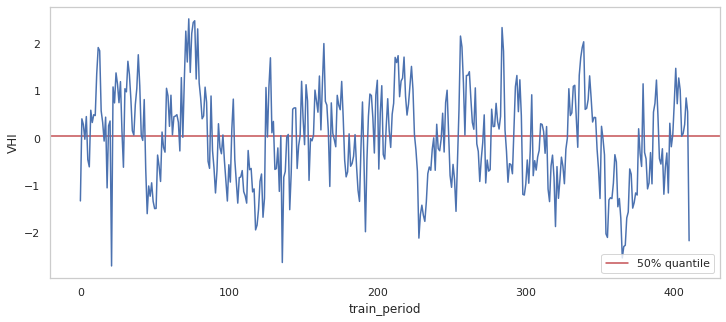

In [ ]:
sns.set(rc={'figure.figsize':(12, 5)})
sns.set_style("whitegrid", {'axes.grid' : False})

y_div = target_train['mean'].quantile(0.5)

plt.ylabel("VHI")
plt.xlabel("train_period")

plt.axhline(y_div, label='50% quantile', color = 'r')
plt.legend(loc="lower right")
plt.plot(target_train['mean'])

In [ ]:
# transform the target in 2 classes: 0 for bad, 1 for good

target_train['mean'] = target_train['mean'].apply(lambda x: 1 if x > y_div else 0)
target_validation['mean'] = target_validation['mean'].apply(lambda x: 1 if x > y_div else 0)
target_test['mean'] = target_test['mean'].apply(lambda x: 1 if x > y_div else 0)

<ipython-input-694-3fa7569c77a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_train['mean'] = target_train['mean'].apply(lambda x: 1 if x > y_div else 0)
<ipython-input-694-3fa7569c77a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_validation['mean'] = target_validation['mean'].apply(lambda x: 1 if x > y_div else 0)
<ipython-input-694-3fa7569c77a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [ ]:
# see the number of instances for each class for test purpose and to check balance of class

np.unique(target_train['mean'], return_counts = True)

(array([0, 1]), array([206, 205]))

In [ ]:
y_train = target_train.values
y_validation = target_validation.values
y_test = target_test.values
y_train_validation = pd.concat([target_train, target_validation]).values

In [ ]:
def plot_conmat(true, pred, title, ax):
    conmat = confusion_matrix(true, pred, labels = [0, 1])
    val = np.mat(conmat)

    df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
        )
    
    group_counts = ["Count: {0:0.0f}".format(value) for value in
                df_cm.to_numpy().flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                      (df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]).values.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues', ax=ax)
    plt.rcParams["figure.figsize"] = (5,5)
    if title is not None : ax.set_title(title) 

## Logistic Regression

In [ ]:
chosen_features_ids = [1, 2, 7]

X_train = features_train.iloc[:,chosen_features_ids].values
X_validation = features_validation.iloc[:,chosen_features_ids].values
X_test = features_test.iloc[:,chosen_features_ids].values

X_train_validation = pd.concat([features_train.iloc[:,chosen_features_ids], features_validation.iloc[:,chosen_features_ids]]).values

In [ ]:
chosen_features_ids = [1, 7, 11]

chosen_features = features_df.iloc[:,chosen_features_ids]
idx_dic = {}
print("Chosen features with CMI feature selection for " + region + " :\n")
for col in chosen_features.columns:
    idx_dic[col] = chosen_features.columns.get_loc(col)
print('\n'.join(f'{value}: {key}' for key, value in idx_dic.items()))

Chosen features with CMI feature selection for Ticino :

0: cyclostationary_mean_Ticino_tg_1w
1: cyclostationary_mean_Ticino_rr_1w
2: cyclostationary_mean_Ticino_rr_16w


In [ ]:
# check validation score to choose best features among the CMI sets 0.77
from sklearn.linear_model import LogisticRegression 

log_regr = LogisticRegression(solver='lbfgs', random_state = 42)

log_regr.fit(X_train, y_train.ravel())

print("Valid accuracy logistic regression: ", round(log_regr.score(X_validation, y_validation),3))
print("Train accuracy logistic regression: ", round(log_regr.score(X_train, y_train),3))

Valid accuracy logistic regression:  0.772
Train accuracy logistic regression:  0.64


In [ ]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(solver='lbfgs', random_state = 42)

log_regr.fit(X_train_validation, y_train_validation.ravel())
print("Test accuracy logistic regression: ", round(log_regr.score(X_test, y_test),3))
print("Train accuracy logistic regression: ", round(log_regr.score(X_train_validation, y_train_validation),3))

Test accuracy logistic regression:  0.737
Train accuracy logistic regression:  0.681


## Extra Trees Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 220, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 25, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }

In [ ]:
from sklearn.model_selection import GridSearchCV

ext = ExtraTreesClassifier(random_state=42)

opt = GridSearchCV(estimator=ext, param_grid = param_grid, verbose = 3)

# GridSearchCV already does 5-fold cross validation by default,
# so I take both train and validation data
opt.fit(X_train_validation, y_train_validation)

In [ ]:
opt.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
rfc= ExtraTreesClassifier(random_state=42, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 50, n_estimators = 100, bootstrap = 'True')
rfc.fit(X_train_validation, y_train_validation.ravel())

ExtraTreesClassifier(bootstrap='True', min_samples_split=50, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
rf_mae = mean_absolute_error(y_test, rfc.predict(X_test))
rf_mse = mean_squared_error(y_test, rfc.predict(X_test))
r2_test = rfc.score(X_test, y_test)
r2_train = rfc.score(X_train_validation, y_train_validation)

print(" ExtraTreesClassifier: ")
print(" MAE: ", round(rf_mae,3), "\n", "MSE: ", round(rf_mse,3), "\n","acc_test: ",round(r2_test,3), "\n", "acc_train: ", round(r2_train,3))

 ExtraTreesClassifier: 
 MAE:  0.259 
 MSE:  0.259 
 acc_test:  0.741 
 acc_train:  0.742


In [ ]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(chosen_features_df.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cyclostationary_mean_Emiliani2_tg Importance: 0.22
Variable: cyclostationary_mean_Emiliani2_rr Importance: 0.22
Variable: cyclostationary_mean_Emiliani2_tg_4w Importance: 0.18
Variable: cyclostationary_mean_Emiliani2_tg_12w Importance: 0.17
Variable: cyclostationary_mean_Emiliani2_tg_1w Importance: 0.14
Variable: cyclostationary_mean_Emiliani2_tg_8w Importance: 0.08


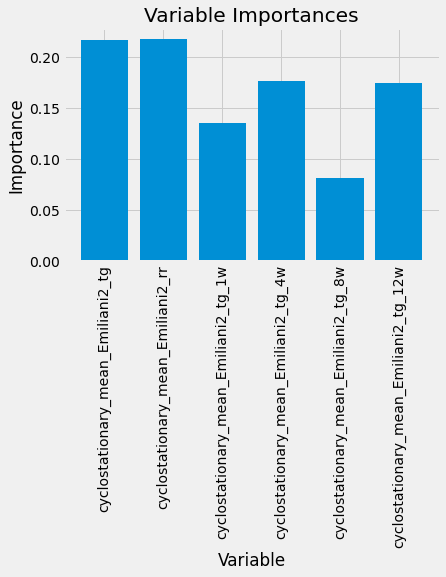

In [ ]:
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

<ipython-input-50-bc08fa3efa94>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]).values.flatten()]


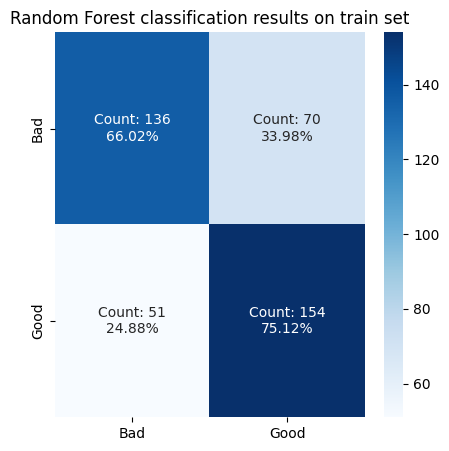

In [ ]:
fig,ax=plt.subplots()
plt.style.use('default')
plot_conmat(y_train, rfc.predict(X_train), 'Random Forest classification results on train set', ax=ax)

<ipython-input-50-bc08fa3efa94>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]).values.flatten()]


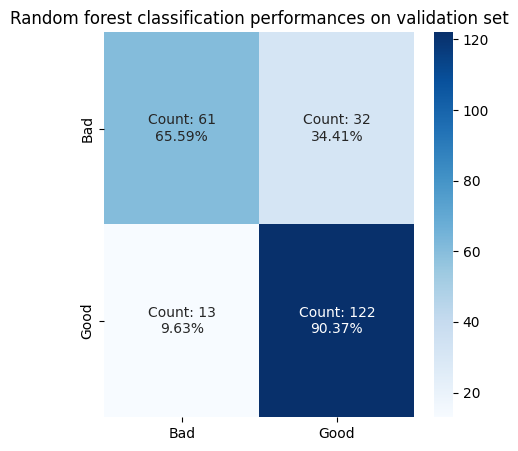

In [ ]:
fig,ax=plt.subplots()
plot_conmat(y_validation, rfc.predict(X_validation), 'Random forest classification performances on validation set', ax=ax)

<ipython-input-50-bc08fa3efa94>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]).values.flatten()]


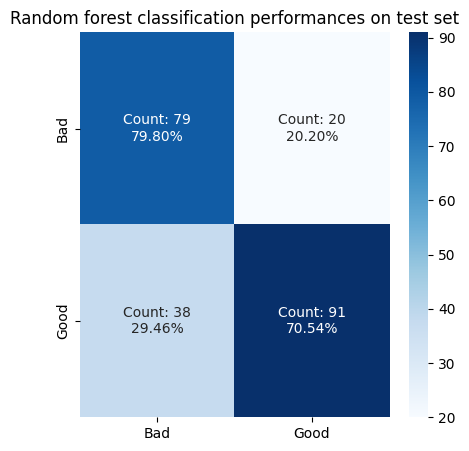

In [ ]:
fig, ax = plt.subplots()
plot_conmat(y_test, rfc.predict(X_test), 'Random forest classification performances on test set', ax=ax)
plt.savefig('random_forest_classification_singletask.eps', format='eps')

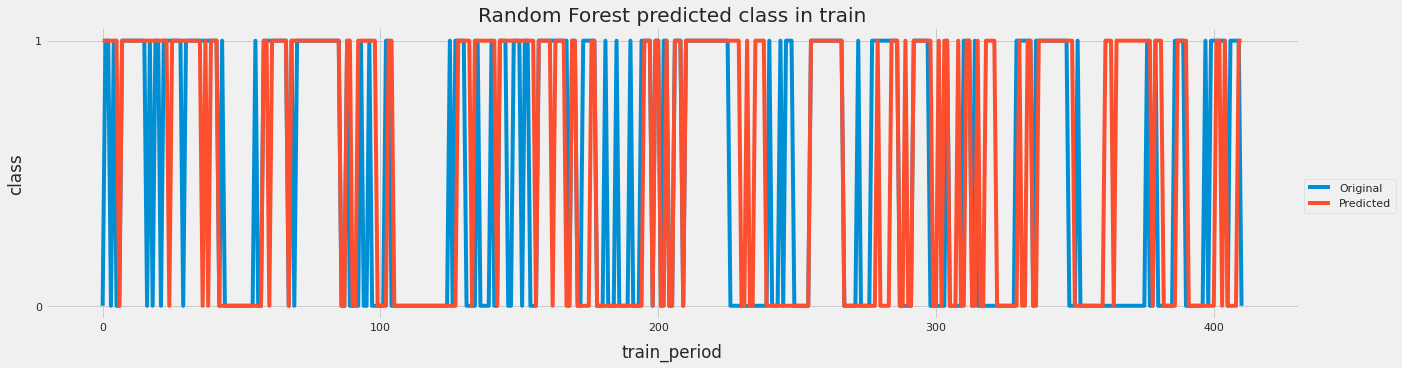

In [ ]:
fig, ax= plt.subplots()
plt.style.use('fivethirtyeight')
plt.plot(y_train, label='Original')
plt.title('Random Forest predicted class in train')
plt.plot(rfc.predict(X_train), label='Predicted')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel('train_period', labelpad=10)
plt.ylabel('class', labelpad=10)
plt.rcParams["figure.figsize"] = (20,5)

plt.show()

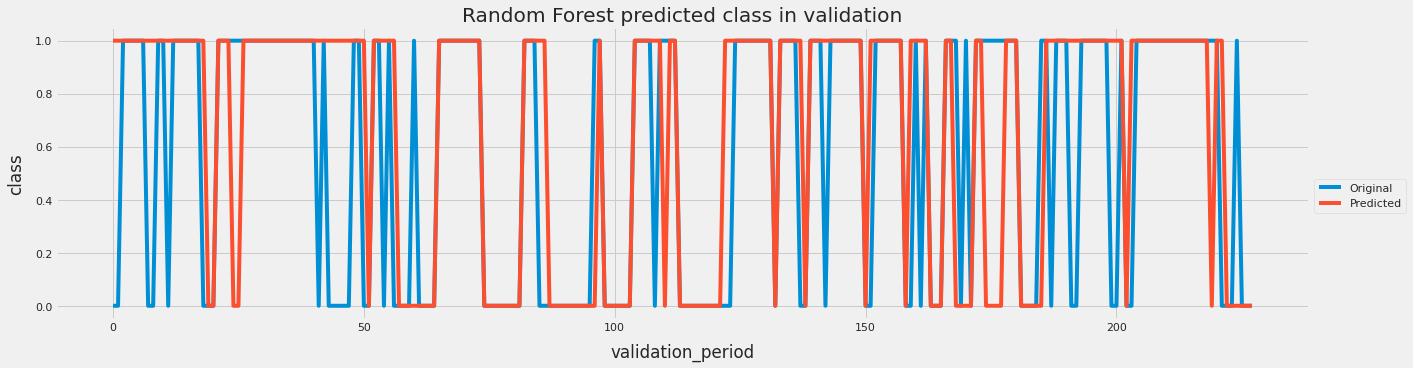

In [ ]:
plt.plot(y_validation, label='Original')
plt.style.use('fivethirtyeight')
plt.title('Random Forest predicted class in validation')
plt.plot(rfc.predict(X_validation), label='Predicted')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel('validation_period', labelpad=10)
plt.ylabel('class', labelpad=10)
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

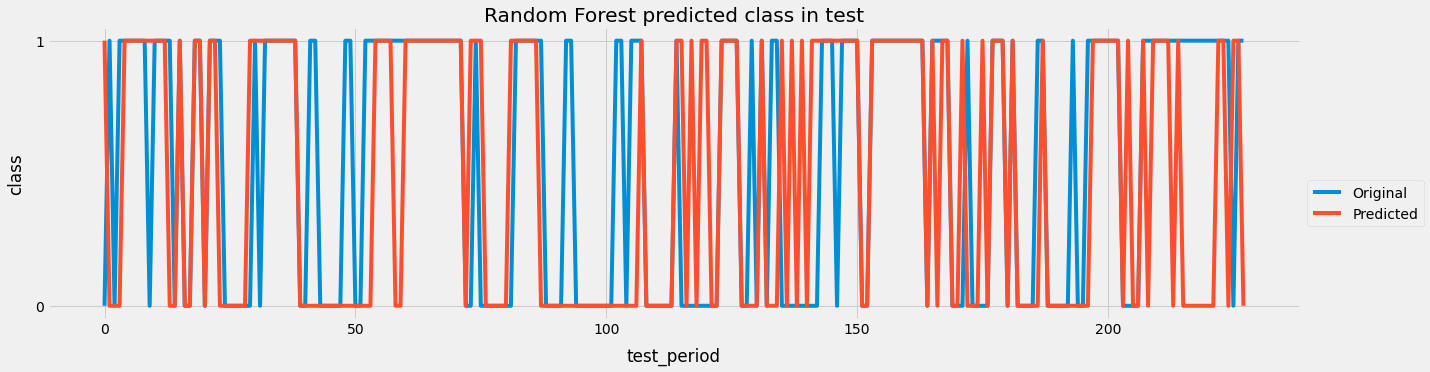

In [ ]:
fig, ax= plt.subplots()
plt.style.use('fivethirtyeight')
#y_test.reset_index(inplace = True, drop = True)
plt.plot(y_test, label='Original')
plt.title('Random Forest predicted class in test')
plt.plot(rfc.predict(X_test), label='Predicted')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel('test_period', labelpad=10)
plt.ylabel('class', labelpad=10)
plt.rcParams["figure.figsize"] = (20,5)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## Feed Forward

In [ ]:
def feed_forward():
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(len(classnames), activation='softmax',name='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# 10 for 0(bad), 01 for 1 (good)
y_train = np.eye(2)[target_train['mean']]
y_validation = np.eye(2)[target_validation['mean']]
y_test = np.eye(2)[target_test['mean']]

In [ ]:
tuning_model = feed_forward()

history = tuning_model.fit(X_train, y_train, validation_data = (X_validation, y_validation), shuffle=False, epochs=1000, verbose=0)

Text(0, 0.5, 'loss')

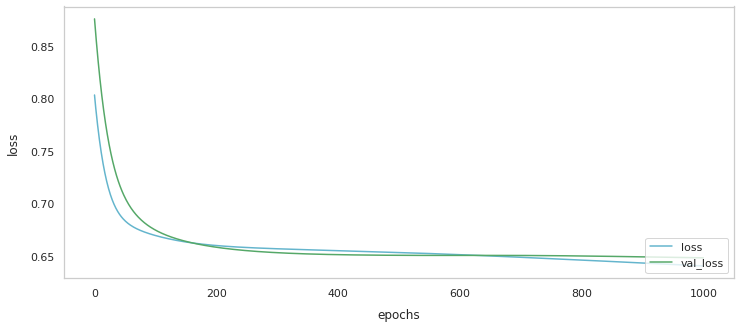

In [ ]:
plt.plot(history.history['loss'], 'c', label= "loss")
plt.plot(history.history['val_loss'],'g', label= "val_loss")

plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (15,5)

plt.xlabel('epochs', labelpad=10)
plt.ylabel('loss', labelpad=10)

In [ ]:
y_train_val = np.concatenate((y_train, y_validation))

fitting_times = 10
model = feed_forward()

test_acc = [0, 0]
train_acc = [0, 0]

for i in range(fitting_times):
  model.fit(X_train_validation, y_train_val, shuffle=False, epochs=180, verbose=0)

  if (test_acc[1] < model.evaluate(X_test,y_test, verbose = 0)[1]):
     test_acc = model.evaluate(X_test,y_test, verbose = 0)
     train_acc = model.evaluate(X_train_validation,y_train_val, verbose = 0)

In [ ]:
print("FFNN:")
print("      ",model.metrics_names)
print("test: ", np.around(test_acc,3))
print("train: ", np.around(train_acc,3))

FFNN:
       ['loss', 'accuracy']
test:  [0.56  0.759]
train:  [0.599 0.695]


13/13 [==============================] - 0s 1ms/step


<ipython-input-50-bc08fa3efa94>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]).values.flatten()]


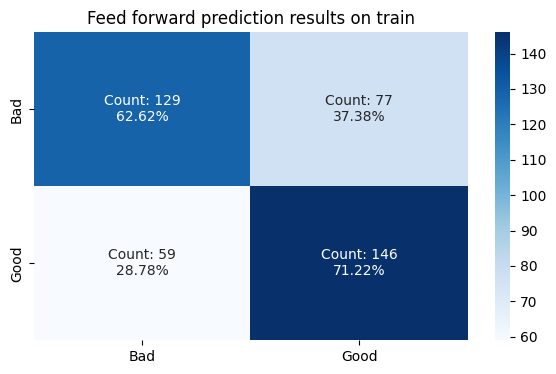

In [ ]:
fig,ax = plt.subplots(figsize=(7,4))
plot_conmat(y_train.argmax(axis=1), model.predict(X_train).argmax(axis=1), 'Feed forward prediction results on train', ax=ax)

8/8 [==============================] - 0s 1ms/step


<ipython-input-50-bc08fa3efa94>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]).values.flatten()]


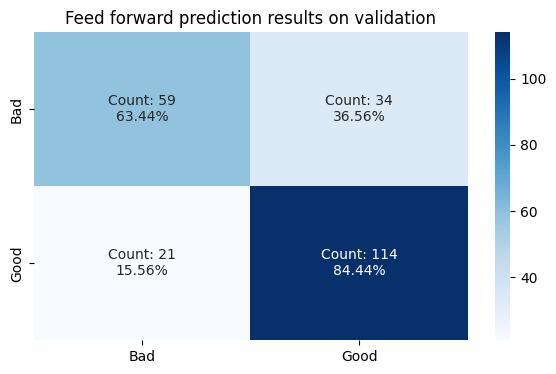

In [ ]:
fig,ax = plt.subplots(figsize=(7,4))
plot_conmat(y_validation.argmax(axis=1), model.predict(X_validation).argmax(axis=1), 'Feed forward prediction results on validation', ax=ax)

8/8 [==============================] - 0s 2ms/step


<ipython-input-50-bc08fa3efa94>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  (df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]).values.flatten()]


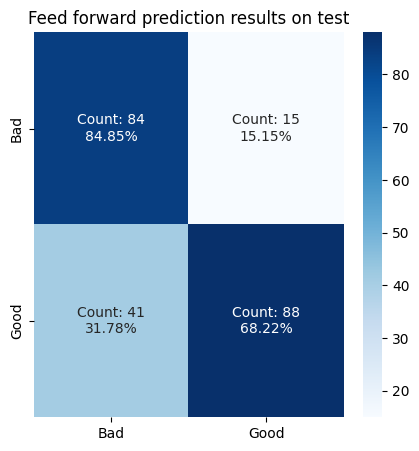

In [ ]:
fig, ax = plt.subplots()
plot_conmat(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1), 'Feed forward prediction results on test', ax=ax)

13/13 [==============================] - 0s 2ms/step


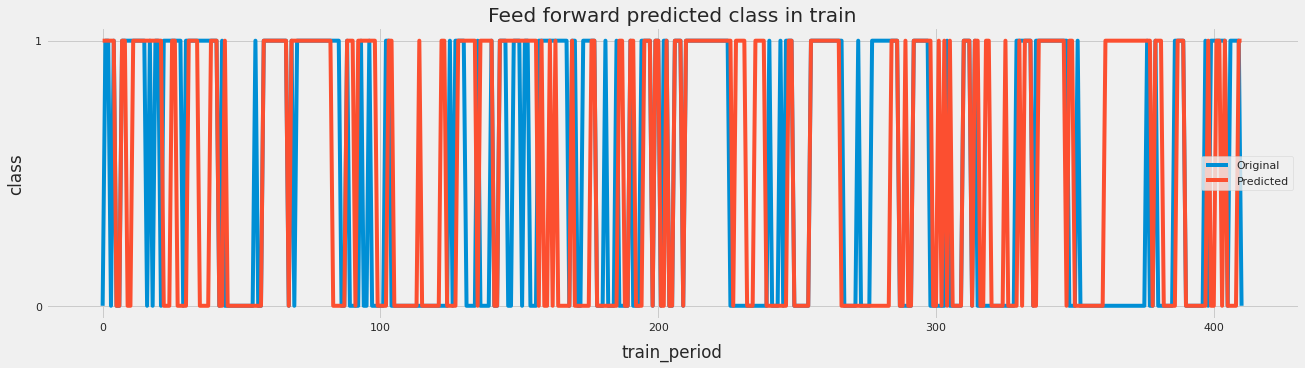

In [ ]:
fig, ax= plt.subplots()
plt.plot(list(map(lambda x: 0 if x==0 else 1, y_train.argmax(axis=1))), label='Original')
plt.title('Feed forward predicted class in train')
plt.plot(list(map(lambda x: 0 if x==0 else 1, model.predict(X_train).argmax(axis=1))), label='Predicted')

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('train_period', labelpad=10)
plt.ylabel('class', labelpad=10)
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

8/8 [==============================] - 0s 3ms/step


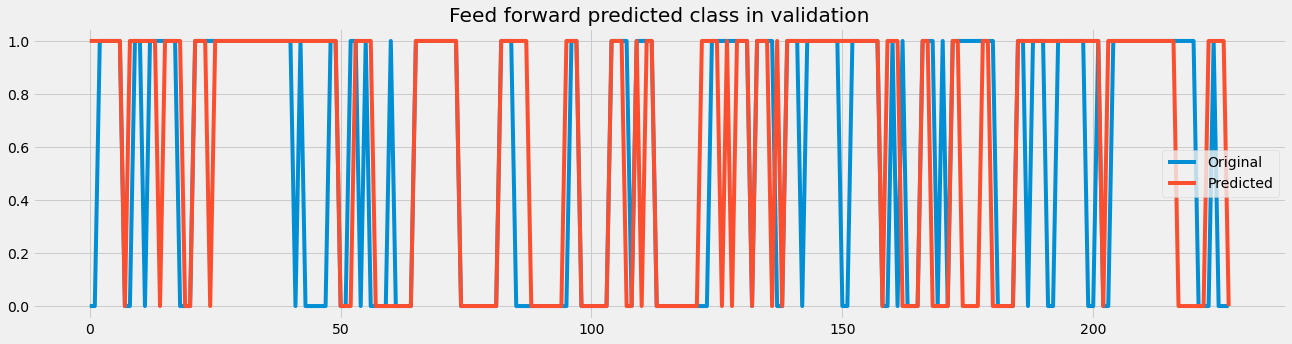

In [ ]:
plt.plot(list(map(lambda x: 0 if x==0 else 1, y_validation.argmax(axis=1))), label='Original')
plt.title('Feed forward predicted class in validation')
plt.plot(list(map(lambda x: 0 if x==0 else 1, model.predict(X_validation).argmax(axis=1))), label='Predicted')
plt.legend()
plt.show()

In [ ]:
trues_test = list(map(lambda x: 0 if x==0 else 1, y_test.argmax(axis=1)))
preds = list(map(lambda x: 0 if x==0 else 1, model.predict(X_test).argmax(axis=1)))

8/8 [==============================] - 0s 1ms/step


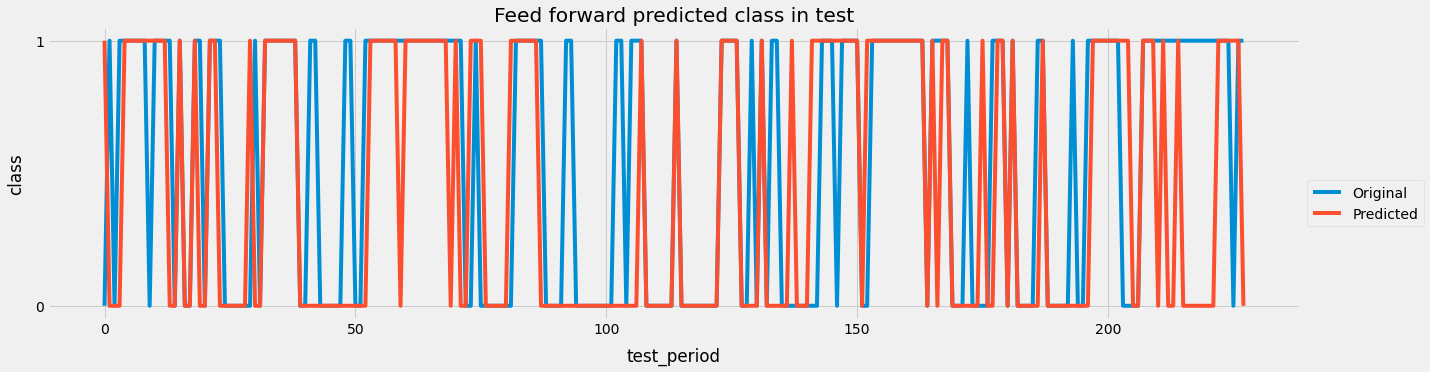

In [ ]:
fig, ax = plt.subplots()
plt.plot(trues_test, label='Original')
plt.title('Feed forward predicted class in test')
plt.plot(preds, label='Predicted')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel('test_period', labelpad=10)
plt.ylabel('class', labelpad=10)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

## Chosen features

Chosen features:  
Adda [7, 0, 12]  
Dora [8, 11, 6]    
Emiliani1 [7, 8, 11, 0]    
Emiliani2 [7, 10, 1, 2, 12]    
Garda_Mincio [7, 1]  
Lambro_Olona [1, 8, 2, 12]  
Oglio_Iseo [1, 2, 7]  
Piemonte_Sud [9, 7, 2, 6, 11]    
Piemonte_Nord [1, 12, 7, 10, 2]  
Ticino [1, 7, 11]  